In [78]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
%matplotlib inline
!pip install scikit-learn

In [106]:
# importing data from PMA_data.xlsx
df = pd.read_excel('PMA_data.xlsx', sheet_name = 1)

#displaying the data
df

,Applicants total,ID number,Name,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,6142.0,100654,Alabama A & M University,No,No,No,No,Yes,No,Yes,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,5689.0,100663,University of Alabama at Birmingham,No,Yes,No,Yes,Yes,Yes,Yes,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,NaN,100690,Amridge University,No,No,Yes,No,Yes,No,Yes,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,2054.0,100706,University of Alabama in Huntsville,Yes,No,No,No,Yes,Yes,Yes,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,10245.0,100724,Alabama State University,No,No,No,No,Yes,No,Yes,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,393.0,451671,University of South Florida-Sarasota-Manatee,No,No,Yes,No,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1530,3033.0,454184,The Kingâ€™s College,No,No,No,No,Yes,No,No,...,100.0,100.0,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0
1531,NaN,454582,Ottawa University-Online,No,No,No,No,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,122.0,455770,Providence Christian College,No,No,No,No,Yes,No,No,...,100.0,100.0,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0


In [107]:
#deleting ID number since it isnt used in modelling, useless feature
df = df.drop(columns = ['ID number'])

In [108]:
# cheking if ID number was deleted
df

,Applicants total,Name,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,6142.0,Alabama A & M University,No,No,No,No,Yes,No,Yes,No,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,5689.0,University of Alabama at Birmingham,No,Yes,No,Yes,Yes,Yes,Yes,Yes,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,NaN,Amridge University,No,No,Yes,No,Yes,No,Yes,No,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,2054.0,University of Alabama in Huntsville,Yes,No,No,No,Yes,Yes,Yes,Yes,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,10245.0,Alabama State University,No,No,No,No,Yes,No,Yes,Yes,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,393.0,University of South Florida-Sarasota-Manatee,No,No,Yes,No,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1530,3033.0,The Kingâ€™s College,No,No,No,No,Yes,No,No,No,...,100.0,100.0,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0
1531,NaN,Ottawa University-Online,No,No,No,No,Yes,No,Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,122.0,Providence Christian College,No,No,No,No,Yes,No,No,No,...,100.0,100.0,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0


In [109]:
#replace blank cells with mean average

df.fillna(df.mean(), inplace = True)

In [110]:
# make sure that we have no missing values
df.isnull().sum()

Applicants total                                         0
Name                                                     0
Offers Less than one year certificate                    2
Offers One but less than two years certificate           2
Offers Associate's degree                                2
                                                        ..
Percent of freshmen receiving state/local grant aid      0
Percent of freshmen receiving institutional grant aid    0
Percent of freshmen receiving student loan aid           0
Percent of freshmen receiving federal student loans      0
Percent of freshmen receiving other loan aid             0
Length: 123, dtype: int64

In [112]:
# we can see there are null values
# drop the rows with null values
df = df.dropna()

# P.S. I could check before replacing null values with mean average for the existence of rows with fully null values.
# But, I was lazy to do so)))

df.isnull().sum()
# we are sure that there is now blank cells

Applicants total                                         0
Name                                                     0
Offers Less than one year certificate                    0
Offers One but less than two years certificate           0
Offers Associate's degree                                0
                                                        ..
Percent of freshmen receiving state/local grant aid      0
Percent of freshmen receiving institutional grant aid    0
Percent of freshmen receiving student loan aid           0
Percent of freshmen receiving federal student loans      0
Percent of freshmen receiving other loan aid             0
Length: 123, dtype: int64

In [113]:
# cheking data types 
print (df.dtypes)

Applicants total                                         float64
Name                                                      object
Offers Less than one year certificate                     object
Offers One but less than two years certificate            object
Offers Associate's degree                                 object
                                                          ...   
Percent of freshmen receiving state/local grant aid      float64
Percent of freshmen receiving institutional grant aid    float64
Percent of freshmen receiving student loan aid           float64
Percent of freshmen receiving federal student loans      float64
Percent of freshmen receiving other loan aid             float64
Length: 123, dtype: object


In [114]:
df.head()

,Applicants total,Name,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,6142.000000,Alabama A & M University,No,No,No,No,Yes,No,Yes,No,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,5689.000000,University of Alabama at Birmingham,No,Yes,No,Yes,Yes,Yes,Yes,Yes,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,6391.193174,Amridge University,No,No,Yes,No,Yes,No,Yes,No,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,2054.000000,University of Alabama in Huntsville,Yes,No,No,No,Yes,Yes,Yes,Yes,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,10245.000000,Alabama State University,No,No,No,No,Yes,No,Yes,Yes,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0


In [115]:
#transforming string data to numerical one for the columns from 2 to 13

for i in range(2,14):
    df.iloc[:,i] = np.where(df.iloc[:,i] == 'No', 0, 1)

# can be used also the following code for transforming: 
# df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
# however this one might run longer than the loop, since it will check all the cells for No and Yes


In [96]:
df

,Applicants total,Name,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,6142.000000,Alabama A & M University,0,0,0,0,1,0,1,0,...,97.000000,89.000000,81.00000,81.000000,7.000000,1.000000,32.000000,89.000000,89.000000,1.000000
1,5689.000000,University of Alabama at Birmingham,0,1,0,1,1,1,1,1,...,90.000000,79.000000,36.00000,36.000000,10.000000,0.000000,60.000000,56.000000,55.000000,5.000000
2,6391.193174,Amridge University,0,0,1,0,1,0,1,0,...,100.000000,90.000000,90.00000,90.000000,0.000000,40.000000,90.000000,100.000000,100.000000,0.000000
3,2054.000000,University of Alabama in Huntsville,1,0,0,0,1,1,1,1,...,87.000000,77.000000,31.00000,31.000000,4.000000,1.000000,63.000000,46.000000,46.000000,3.000000
4,10245.000000,Alabama State University,0,0,0,0,1,0,1,1,...,93.000000,87.000000,76.00000,76.000000,13.000000,11.000000,34.000000,81.000000,81.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,393.000000,University of South Florida-Sarasota-Manatee,0,0,1,0,1,1,1,1,...,90.672252,84.464477,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619
1530,3033.000000,The Kingâ€™s College,0,0,0,0,1,0,0,0,...,100.000000,100.000000,34.00000,34.000000,10.000000,4.000000,100.000000,57.000000,56.000000,12.000000
1531,6391.193174,Ottawa University-Online,0,0,0,0,1,0,1,0,...,90.672252,84.464477,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619
1532,122.000000,Providence Christian College,0,0,0,0,1,0,0,0,...,100.000000,100.000000,50.00000,50.000000,14.000000,0.000000,100.000000,64.000000,64.000000,14.000000


In [116]:
# assigning Name and Applicants total to the variables uni_names and Y. Y which is Applicants total is prediction variable

uni_names = df['Name']
Y = df['Applicants total']

# As we are going to build corellation matrix, these two variables should be expluded from the columns 
# beacuse one of them is a Prediction variable (Applicants total), the second one - Name is not used in correllation matrix 
# The rest of the columns represent X variables, which are predictor variables

# drop these variables from dataset
df = df.drop(['Applicants total','Name'], axis = 'columns')

In [117]:
df

,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,0,0,0,0,1,0,1,0,1,0,...,97.000000,89.000000,81.00000,81.000000,7.000000,1.000000,32.000000,89.000000,89.000000,1.000000
1,0,1,0,1,1,1,1,1,1,1,...,90.000000,79.000000,36.00000,36.000000,10.000000,0.000000,60.000000,56.000000,55.000000,5.000000
2,0,0,1,0,1,0,1,0,1,1,...,100.000000,90.000000,90.00000,90.000000,0.000000,40.000000,90.000000,100.000000,100.000000,0.000000
3,1,0,0,0,1,1,1,1,1,1,...,87.000000,77.000000,31.00000,31.000000,4.000000,1.000000,63.000000,46.000000,46.000000,3.000000
4,0,0,0,0,1,0,1,1,1,1,...,93.000000,87.000000,76.00000,76.000000,13.000000,11.000000,34.000000,81.000000,81.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,0,0,1,0,1,1,1,1,0,0,...,90.672252,84.464477,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619
1530,0,0,0,0,1,0,0,0,0,0,...,100.000000,100.000000,34.00000,34.000000,10.000000,4.000000,100.000000,57.000000,56.000000,12.000000
1531,0,0,0,0,1,0,1,0,0,0,...,90.672252,84.464477,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619
1532,0,0,0,0,1,0,0,0,0,0,...,100.000000,100.000000,50.00000,50.000000,14.000000,0.000000,100.000000,64.000000,64.000000,14.000000


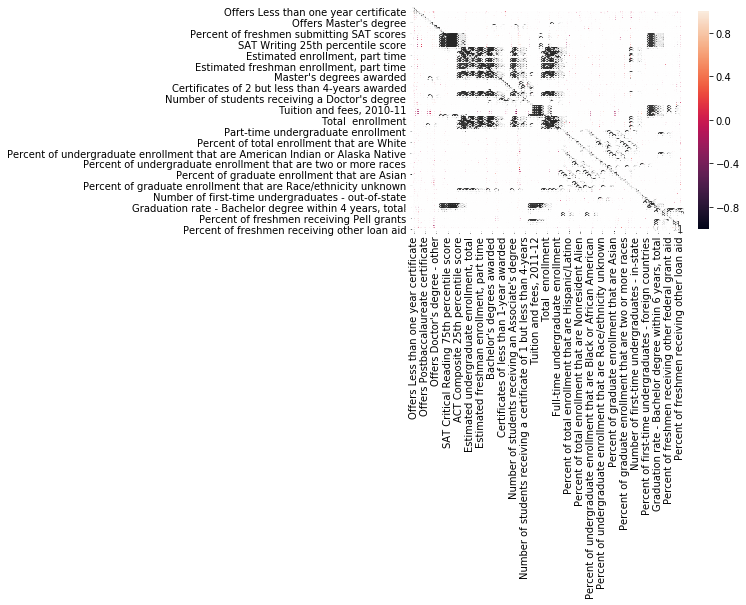

In [118]:
# create a correlation matrix rounding to one decimal point
correlation_matrix = df.corr().round(1)

# print a correlation heat map
sns.heatmap(data = correlation_matrix, annot=True)

In [120]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size = 0.2, random_state=5)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)




(1225, 121)
(307, 121)
(1225,)
(307,)


In [121]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()

# fit the model to the training data
lin_model_fit = lin_model.fit(X_train, Y_train)
lin_model_fit


# print the alpha value of the model (intercept)
print(lin_model_fit.intercept_)


# print the beta values of the model (co-efficients)
betas = lin_model_fit.coef_
counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (unregularised)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1

# predict the training data
predict_train_data = lin_model_fit.predict(X_train)

# calculate RMSE (root mean square error) and R^2 (predictive power)
# training set
rmse = (np.sqrt(mean_squared_error(Y_train, predict_train_data)))
r2 = r2_score(Y_train, predict_train_data)

# print the performance metrics
print("Training performance (unregularised)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# predict the test set
predict_test_data = lin_model_fit.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
# testing set
rmse = (np.sqrt(mean_squared_error(Y_test, predict_test_data)))
r2 = r2_score(Y_test, predict_test_data)

print("Testing performance (unregularised)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# print the coefficients again
betas = lin_model_fit.coef_

counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (unregularised)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1





-20043.290673706055
Beta weights/co-efficients (unregularised)
-----------------------------------------
Offers Less than one year certificate: -28.4661
Offers One but less than two years certificate: 452.5827
Offers Associate's degree: 422.2381
Offers Two but less than 4 years certificate: -723.1657
Offers Bachelor's degree: -4171.125
Offers Postbaccalaureate certificate: -139.3236
Offers Master's degree: 144.8576
Offers Post-master's certificate: -216.7232
Offers Doctor's degree - research/scholarship: -436.3964
Offers Doctor's degree - professional practice: 4.2581
Offers Doctor's degree - other: -472.9849
Offers Other degree: -1054.9126
Percent of freshmen submitting SAT scores: 15.9522
Percent of freshmen submitting ACT scores: 9.955
SAT Critical Reading 25th percentile score: 11.6013
SAT Critical Reading 75th percentile score: -7.9788
SAT Math 25th percentile score: -6.1967
SAT Math 75th percentile score: 7.171
SAT Writing 25th percentile score: -1.7403
SAT Writing 75th percentil

In [123]:
#############################################################
# BREAK
#############################################################

#############################################################
######                                                 ######
######    Expansion to L1 Model                        ######
######                                                 ######
#############################################################

from sklearn.linear_model import Lasso, Ridge, ElasticNet

# fit a L1 model - alpha is a value between 0 and inf where higher
# means more regularisation. Typically we use max = 1
lasso_model = Lasso(alpha = 0.5)

# fit the model to the training data
lasso_model_fit = lasso_model.fit(df, Y)

# predict the training data
predict_lasso = lasso_model_fit.predict(X_train) # set training data

# calculate RMSE (root mean square error) and R^2 (predictive power)
# training set
rmse = (np.sqrt(mean_squared_error(Y_train, predict_lasso)))
r2 = r2_score(Y_train, predict_lasso)

# print the performance metrics
print("Training performance (L1 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# predict the testing data
predict_lasso_test = lasso_model_fit.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
# testing set
rmse = (np.sqrt(mean_squared_error(Y_test, predict_lasso_test)))
r2 = r2_score(Y_test, predict_lasso_test)

# print the performance metrics
print("Testing performance (L1 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# print the coefficients
betas = lasso_model_fit.coef_
counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (L1 regularisation)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1

Training performance (L1 regularisation)
--------------------------------------
RMSE is 3229.1096601213435
R2 score is 0.8498845252758331


Testing performance (L1 regularisation)
--------------------------------------
RMSE is 3395.486495840856
R2 score is 0.8327225684957511


Beta weights/co-efficients (L1 regularisation)
-----------------------------------------
Offers Less than one year certificate: 246.8361
Offers One but less than two years certificate: 374.0146
Offers Associate's degree: 414.9577
Offers Two but less than 4 years certificate: -508.1485
Offers Bachelor's degree: -3484.0868
Offers Postbaccalaureate certificate: -354.4293
Offers Master's degree: 44.7114
Offers Post-master's certificate: -11.3319
Offers Doctor's degree - research/scholarship: -386.6149
Offers Doctor's degree - professional practice: 0.0
Offers Doctor's degree - other: 725.2096
Offers Other degree: 0.0
Percent of freshmen submitting SAT scores: 15.98
Percent of freshmen submitting ACT scores: 9.0447
SA

/Users/kassiyettopysheva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8164920451.974207, tolerance: 10625418.946661584
  positive)


In [126]:
# boston_predict -> predict_train_data
ridge_model = Ridge(alpha = 0.5)

ridge_model_fit = ridge_model.fit(df, Y)

predict_train_data = ridge_model_fit.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, predict_train_data)))
r2 = r2_score(Y_train, predict_train_data)

print("Training performance (L2 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

predict_test_data = ridge_model_fit.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, predict_test_data)))
r2 = r2_score(Y_test, predict_test_data)

print("Testing performance (L2 regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

betas = ridge_model_fit.coef_

counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (L2 regularisation)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1
print("\n")





Training performance (L2 regularisation)
--------------------------------------
RMSE is 3194.148166167602
R2 score is 0.8531175216191218


Testing performance (L2 regularisation)
--------------------------------------
RMSE is 3254.582136613824
R2 score is 0.8463177150322225


Beta weights/co-efficients (L2 regularisation)
-----------------------------------------
Offers Less than one year certificate: 174.6177
Offers One but less than two years certificate: 458.3426
Offers Associate's degree: 449.8558
Offers Two but less than 4 years certificate: -517.4753
Offers Bachelor's degree: -4187.2611
Offers Postbaccalaureate certificate: -319.8884
Offers Master's degree: -34.5262
Offers Post-master's certificate: -27.7198
Offers Doctor's degree - research/scholarship: -412.232
Offers Doctor's degree - professional practice: 106.937
Offers Doctor's degree - other: 668.2396
Offers Other degree: 207.485
Percent of freshmen submitting SAT scores: 14.4017
Percent of freshmen submitting ACT scores: 

In [127]:
elastic_model = ElasticNet(alpha = 0.5, l1_ratio=0.5)

elastic_model_fit = elastic_model.fit(df, Y)

predict_train_data = elastic_model_fit.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, predict_train_data)))
r2 = r2_score(Y_train, predict_train_data)

print("Training performance (ElasticNet regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

predict_test_data = elastic_model_fit.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, predict_test_data)))
r2 = r2_score(Y_test, predict_test_data)

print("Testing performance (ElasticNet regularisation)")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

betas = elastic_model_fit.coef_

counter = 0
for col in df.columns:
    if counter == 0:
        print("Beta weights/co-efficients (ElasticNet regularisation)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1
print("\n")

Training performance (ElasticNet regularisation)
--------------------------------------
RMSE is 3239.2785398333367
R2 score is 0.8489375708840434


Testing performance (ElasticNet regularisation)
--------------------------------------
RMSE is 3459.778230272979
R2 score is 0.8263279784288609


Beta weights/co-efficients (ElasticNet regularisation)
-----------------------------------------
Offers Less than one year certificate: 97.7071
Offers One but less than two years certificate: 123.8322
Offers Associate's degree: 175.2884
Offers Two but less than 4 years certificate: -64.8588
Offers Bachelor's degree: -42.924
Offers Postbaccalaureate certificate: -125.0431
Offers Master's degree: 6.9316
Offers Post-master's certificate: -31.9736
Offers Doctor's degree - research/scholarship: -129.8885
Offers Doctor's degree - professional practice: -25.2387
Offers Doctor's degree - other: 67.2734
Offers Other degree: 0.649
Percent of freshmen submitting SAT scores: 14.9886
Percent of freshmen submit

/Users/kassiyettopysheva/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8321005644.289971, tolerance: 10625418.946661584
  positive)


In [ ]:
'''
Training performance (unregularised)				
--------------------------------------				
RMSE is 3129.161925249743				
R2 score is 0.8590334890229658				
				
				
Testing performance (unregularised)				
--------------------------------------				
RMSE is 4053.19040770954				
R2 score is 0.7616433084945624				
				
                



Training performance (L1 regularisation)
--------------------------------------
RMSE is 3229.1096601213435
R2 score is 0.8498845252758331


Testing performance (L1 regularisation)
--------------------------------------
RMSE is 3395.486495840856
R2 score is 0.8327225684957511  




Training performance (L2 regularisation)
--------------------------------------
RMSE is 3194.148166167602
R2 score is 0.8531175216191218


Testing performance (L2 regularisation)
--------------------------------------
RMSE is 3254.582136613824
R2 score is 0.8463177150322225




Training performance (ElasticNet regularisation)
--------------------------------------
RMSE is 3239.2785398333367
R2 score is 0.8489375708840434


Testing performance (ElasticNet regularisation)
--------------------------------------
RMSE is 3459.778230272979
R2 score is 0.8263279784288609




On the basis of outcomes of these four models, it can be seen that the most optimised model is L2 - Ridge regression.
Because it has the least error RMSE are 3194 (training data) and 3254 (test data)
and R2 is the highest percentage, about 85% meaning that 85% of data lie on the line

'''